In [1]:
#######################################################
#######################################################
#######################################################

## Intro To N L P: Text Processing : EXERCISES ANSWERS ##

#### Exercise ####


#### Please refer to module 1 of IntroToNLP - TextProcessing for Tasks 1-3
#### Task 1:
##### Import all packages required for text processing.
#### Result:


In [2]:
# Helper packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Packages with tools for text processing.
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

#### Task 2:
##### Use `Path` module from `pathlib` to point `data_dir` to your data directory.
#### Result:


In [3]:
from pathlib import Path

# Set `home_dir` to the root directory of your computer.
home_dir = Path(".").resolve()
# Set `main_dir` to the location of your `course` folder.
main_dir = home_dir.parent.parent
# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = str(main_dir) + "/data"

#### Task 3:
##### Read in the "UN_agreement_titles.csv" dataset and save the dataframe as `ex_df`.
##### Remove all rows from the dataset where `title` is empty. 
##### Subset the `title` column from `ex_df` and call it `ex_df_text`.
#### Result:


In [4]:
ex_df = pd.read_csv(str(data_dir) + "/" + "UN_agreement_titles.csv")
# Drop NAs if any.
ex_df = ex_df.dropna(subset=["title"]).reset_index(drop=True)

# Isolate the `snippet` column.
ex_df_text = ex_df["title"]

#### Please refer to module 2 of IntroToNLP - TextProcessing for Tasks 4-6
#### Task 4:
##### Tokenize all documents in `ex_df_text` into a list of tokenized documents and save it as `ex_df_tokenized`.
##### For each tokenized document in `ex_df_tokenized`, do the following:
##### Convert the tokens to lowercase.
##### Get common English stopwords from `nltk.corpus` and remove them from tokenized document.
##### Remove punctuation and all non-alphabetical characters.
##### Perform stemming of tokens using `PorterStemmer()`.
##### Save the number of words in each document as a list and call it `ex_word_counts_per_document`.
##### Save the list of clean documents as `ex_df_clean`.
#### Result:


In [5]:
# Tokenize each document into a large list of tokenized documents.
ex_df_tokenized = [word_tokenize(ex_df_text[i]) for i in range(0, len(ex_df_text))]
print(ex_df_tokenized[0:5])

# Get common English stop words.
stop_words = stopwords.words("english")

# Create a list for clean documents.
ex_df_clean = [None] * len(ex_df_tokenized)

# Create a list of word counts for each clean document.
ex_word_counts_per_document = [None] * len(ex_df_tokenized)

# Process words in all documents.
for i in range(len(ex_df_tokenized)):
    # 1. Convert to lowercase.
    ex_df_clean[i] = [document.lower() for document in ex_df_tokenized[i]]

    # 2. Remove stop words.
    ex_df_clean[i] = [word for word in ex_df_clean[i] if not word in stop_words]

    # 3. Remove punctuation and any non-alphabetical characters.
    ex_df_clean[i] = [word for word in ex_df_clean[i] if word.isalpha()]

    # 4. Stem words.
    ex_df_clean[i] = [PorterStemmer().stem(word) for word in ex_df_clean[i]]

    # Record the word count per document.
    ex_word_counts_per_document[i] = len(ex_df_clean[i])

[['Agreement', 'concerning', 'arrangements', 'for', 'the', 'holding', 'of', 'the', 'fifth', 'session', 'of', 'the', 'Council', 'of', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration', 'at', 'the', 'Palais', 'des', 'Nations', ',', 'Geneva', ',', 'concluded', 'between', 'the', 'United', 'Nations', ',', 'the', 'League', 'of', 'Nations', 'and', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration'], ['Declaration', 'recognizing', 'as', 'compulsory', 'the', 'jurisdiction', 'of', 'the', 'Court', ',', 'in', 'conformity', 'with', 'Article', '36', ',', 'paragraph', '2', ',', 'of', 'the', 'Statute', 'of', 'the', 'International', 'Court', 'of', 'Justice', ',', 'in', 'all', 'legal', 'disputes', 'concerning', 'the', 'interpretation', ',', 'application', 'or', 'validity', 'of', 'any', 'treaty', 'relating', 'to', 'the', 'boundaries', 'of', 'British', 'Honduras', '.', 'London', ',', '13', 'February', '1946'], ['Declaration', 'renewing', 'for', 'a

#### Task 5:
##### Inspect results obtained by performing Task 4.
##### Plot a histogram for word counts per document and set bins to the number of unique values in the list.
#### Result:


['declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', 'paragraph', 'statut', 'intern']
['exchang', 'note', 'constitut', 'agreement', 'amend', 'agreement', 'amend']


Text(0, 0.5, 'Frequency')

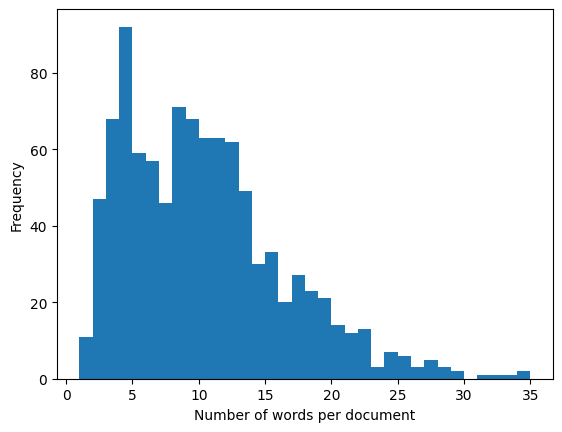

In [6]:
print(ex_df_clean[3][:10])
print(ex_df_clean[7][:10])

# Plot histogram.
plt.hist(ex_word_counts_per_document, bins=len(set(ex_word_counts_per_document)))
plt.xlabel("Number of words per document")
plt.ylabel("Frequency")

#### Task 6:
##### Convert word counts list and documents list to NumPy arrays and call them `ex_word_counts_array` and `ex_df_array` respectively.
##### Filter out all documents containing less than 4 words and save the filtered array as a list with the name `ex_df_clean`. Check how many valid documents are left.
##### Use list comprehension to combine all words per document into one character string each. Save this list of lists as `ex_df_clean_list`. Hint: Use the `join()` function for converting words into a single string.
#### Result:


In [7]:
ex_word_counts_array = np.array(ex_word_counts_per_document)
ex_df_array = np.array(ex_df_clean, dtype=object)
print(len(ex_df_array))

ex_valid_documents = np.where(ex_word_counts_array >= 4)[0]
ex_df_array = ex_df_array[ex_valid_documents]
print(len(ex_df_array))

# Convert the array back to a list.
ex_df_clean = ex_df_array.tolist()

# Join words in each document into a single character string.
ex_df_clean_list = [" ".join(document) for document in ex_df_clean]
print(ex_df_clean_list[:5])

983
857
['agreement concern arrang hold fifth session council unit nation relief rehabilit administr palai de nation geneva conclud unit nation leagu nation unit nation relief rehabilit administr', 'declar recogn compulsori jurisdict court conform articl paragraph statut intern court justic legal disput concern interpret applic valid treati relat boundari british hondura london februari', 'declar renew period five year begin februari declar recogn compulsori jurisdict court conform articl paragraph statut intern court justic legal disput concern interpret applic valid treati relat boundari british hondura london februari', 'declar recogn compulsori jurisdict court conform articl paragraph statut intern court justic new york decemb', 'convent unit kingdom franc respect commerci relat franc seychel island sign london april denunci part unit kingdom']


#### Please refer to module 3 of IntroToNLP - TextProcessing for Tasks 7-9
#### Task 7:
##### Create a `CountVectorizer` object and use it to transform `ex_df_clean_list` into a Document-Term Matrix (DTM) and call it `ex_X`.
##### Use the same `CountVectorizer` object to print the first 6 feature names.
##### Convert the DTM `ex_X` into a Pandas DataFrame `ex_DTM` and set the column names as the feature names.
#### Result:


In [8]:
# Initialize `CountVectorizer`.
ex_vec = CountVectorizer()
# Transform the list of clean documents `df_clean_list` into DTM.
ex_X = ex_vec.fit_transform(ex_df_clean_list)
# Get list of column names.
print(ex_vec.get_feature_names_out()[:6])
# Convert the matrix into a Pandas DataFrame for easier manipulation.
ex_DTM = pd.DataFrame(ex_X.toarray(), columns=ex_vec.get_feature_names_out())
print(ex_DTM.head())

['aagreement' 'ababa' 'abolit' 'accommod' 'accord' 'account']
   aagreement  ababa  abolit  accommod  accord  account  accru  acquir  \
0           0      0       0         0       0        0      0       0   
1           0      0       0         0       0        0      0       0   
2           0      0       0         0       0        0      0       0   
3           0      0       0         0       0        0      0       0   
4           0      0       0         0       0        0      0       0   

   acquisit  across  ...  yarnal  year  york  yosemit  young  youth  yugoslav  \
0         0       0  ...       0     0     0        0      0      0         0   
1         0       0  ...       0     0     0        0      0      0         0   
2         0       0  ...       0     1     0        0      0      0         0   
3         0       0  ...       0     0     1        0      0      0         0   
4         0       0  ...       0     0     0        0      0      0         0   

   yug

#### Task 8:
##### Sum the frequencies of each word in all documents and save the result as a dictionary `ex_corpus_freq_dist`.
##### Convert this dictionary into an `nltk.FreqDist` object.
##### Use the `nltk.FreqDist` object to plot the 50 most frequent words in the corpus.
#### Result:


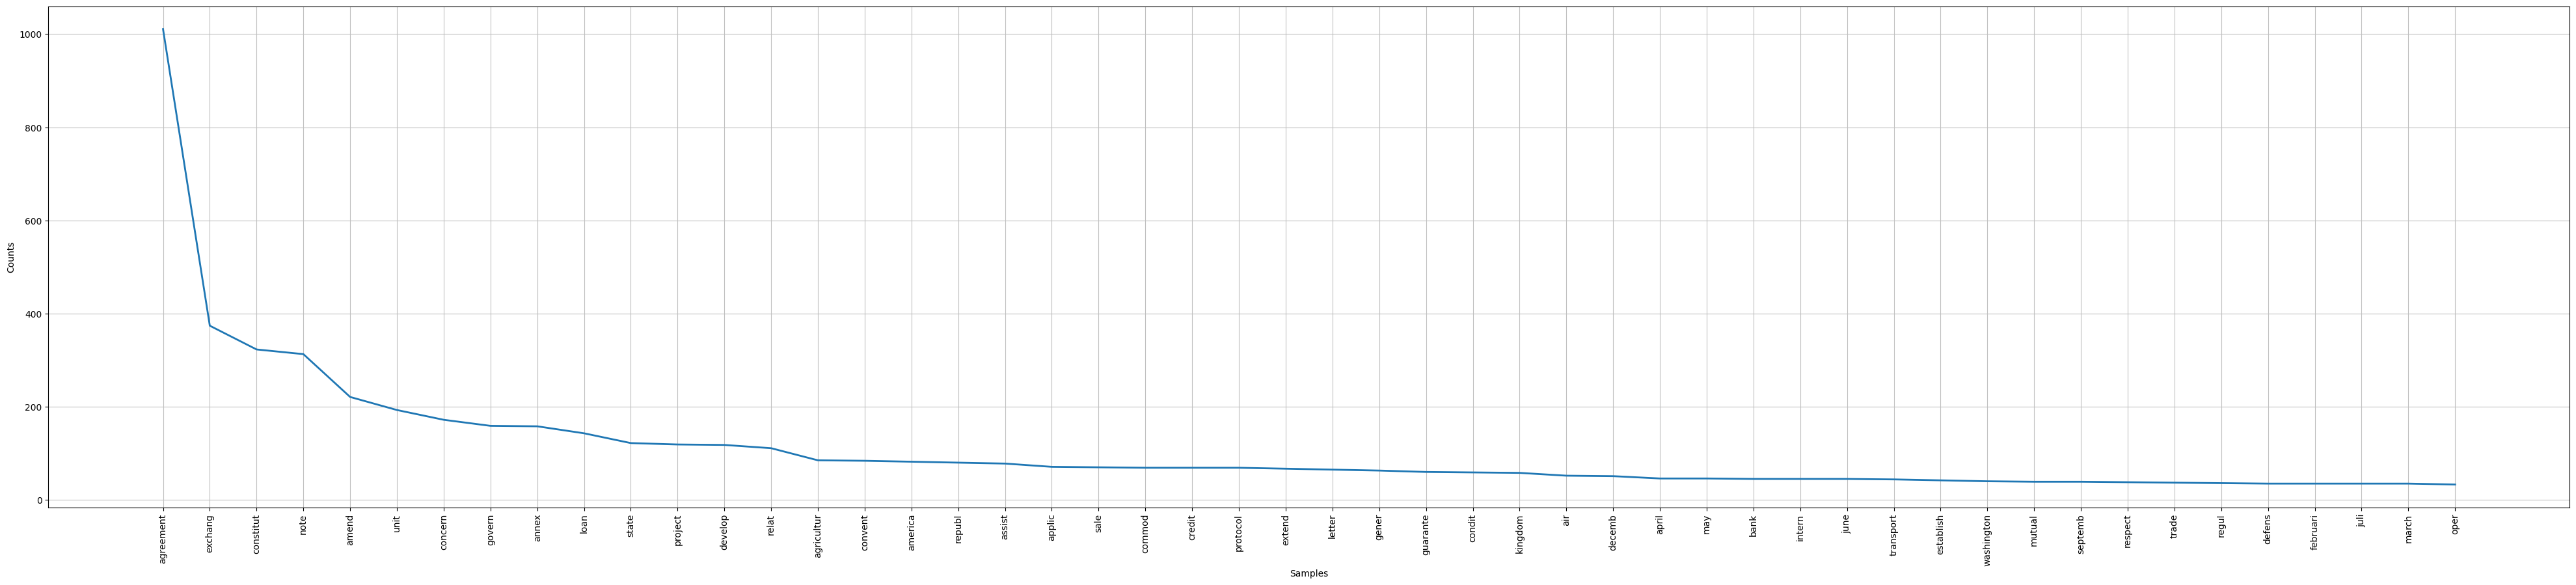

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
# Save frequencies as a dictionary.
ex_corpus_freq_dist = ex_DTM.sum(axis=0).to_dict()
# Save as a `FreqDist` object native to `nltk`.
ex_corpus_freq_dist = nltk.FreqDist(ex_corpus_freq_dist)
# Plot distribution.
plt.figure(figsize=(50, 10))
ex_corpus_freq_dist.plot(50)

#### Task 9:
##### Take the 3rd document in `ex_df_clean_list` and create bi-gram and tri-gram for it. Hint: Use the `ngrams()` function from `nltk`.
##### Construct a wordcloud of the corpus `ex_df_clean_list` and set `collocations=False`.
##### Plot the wordcloud using bilinear interpolation.
##### Turn off the plot axes.
#### Result:


[('declar', 'renew'), ('renew', 'period'), ('period', 'five'), ('five', 'year'), ('year', 'begin'), ('begin', 'februari'), ('februari', 'declar'), ('declar', 'recogn'), ('recogn', 'compulsori'), ('compulsori', 'jurisdict'), ('jurisdict', 'court'), ('court', 'conform'), ('conform', 'articl'), ('articl', 'paragraph'), ('paragraph', 'statut'), ('statut', 'intern'), ('intern', 'court'), ('court', 'justic'), ('justic', 'legal'), ('legal', 'disput'), ('disput', 'concern'), ('concern', 'interpret'), ('interpret', 'applic'), ('applic', 'valid'), ('valid', 'treati'), ('treati', 'relat'), ('relat', 'boundari'), ('boundari', 'british'), ('british', 'hondura'), ('hondura', 'london'), ('london', 'februari')]
[('declar', 'renew', 'period'), ('renew', 'period', 'five'), ('period', 'five', 'year'), ('five', 'year', 'begin'), ('year', 'begin', 'februari'), ('begin', 'februari', 'declar'), ('februari', 'declar', 'recogn'), ('declar', 'recogn', 'compulsori'), ('recogn', 'compulsori', 'jurisdict'), ('comp

(-0.5, 399.5, 199.5, -0.5)

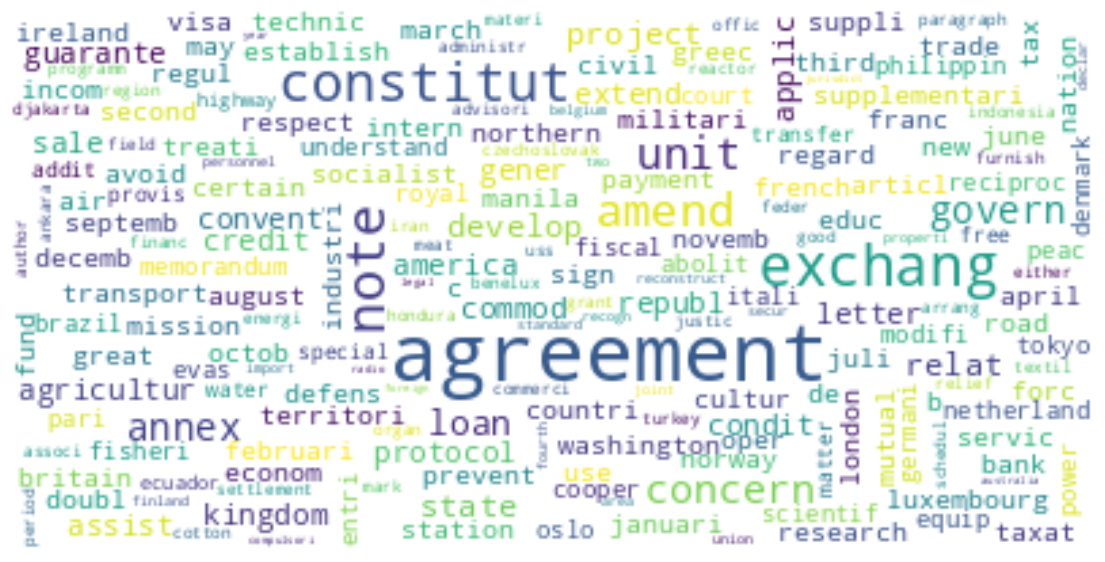

In [10]:
ex_word = ex_df_clean_list[2].split()
print(list(ngrams(ex_word, 2)))  # <- set value of n as 2
print(list(ngrams(ex_word, 3)))  # <- set value of n as 3

# Construct a word cloud from corpus.
ex_wordcloud = WordCloud(max_font_size=30, background_color="white", collocations=False)
ex_wordcloud = ex_wordcloud.generate(" ".join(ex_df_clean_list))

plt.figure(figsize=(14, 20))
plt.imshow(ex_wordcloud, interpolation="bilinear")
plt.axis("off")